In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error, precision_score, recall_score, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

### Stage 1: Data Loading and Preprocessing

In [ ]:
# 1️⃣ Load the data
file_path = "HrData.xlsx"
xls = pd.ExcelFile(file_path)


# Load Excel sheets
employees = pd.read_excel(xls, sheet_name="Employee")
performance = pd.read_excel(xls, sheet_name="PerformanceRating")

# 2️⃣ Merge the data
merged_df = pd.merge(employees, performance, on="EmployeeID", how="left").dropna()

# 3️⃣ Create the promotion variable
merged_df["Promotion"] = (merged_df["YearsSinceLastPromotion"] == 0).astype(int)

In [ ]:
# 4️⃣ Define the features used in the model
features = [
    "Age", "Education", "YearsAtCompany", "YearsInMostRecentRole",
    "YearsWithCurrManager", "EnvironmentSatisfaction", "JobSatisfaction",
    "RelationshipSatisfaction", "TrainingOpportunitiesWithinYear",
    "TrainingOpportunitiesTaken", "WorkLifeBalance", "SelfRating", "ManagerRating"
]
X = merged_df[features]
y = merged_df["Promotion"]

# 5️⃣ Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 6️⃣ Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
rf_model.fit(X_train, y_train)

# 7️⃣ Evaluate the model
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("\n✅ Model Accuracy:", accuracy)
print("\n📊 Classification Report:\n", report)

# 8️⃣ Test the model with new data
new_employee = np.array([[35, 3, 7, 4, 3, 3, 4, 2, 1, 2, 3, 4, 5]])
prediction = rf_model.predict(new_employee)[0]
print("\n🚀 Promotion Prediction:", "Yes" if prediction == 1 else "No")


✅ Model Accuracy: 0.977645305514158

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1109
           1       0.97      0.90      0.93       233

    accuracy                           0.98      1342
   macro avg       0.98      0.95      0.96      1342
weighted avg       0.98      0.98      0.98      1342


🚀 Promotion Prediction: No


c:\Users\dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# 8️⃣ وظيفة لاختبار موظف جديد

def predict_promotion(employee_data):
    employee_df = pd.DataFrame([employee_data], columns=features)
    prediction = rf_model.predict(employee_df)[0]
    return "نعم" if prediction == 1 else "لا"

# إدخال بيانات موظف جديد يدويًا
def input_employee():
    print("\n🔹 أدخل بيانات الموظف الجديد:")
    employee_data = []
    feature_names = [
        "العمر", "التعليم", "سنوات العمل بالشركة", "سنوات في آخر وظيفة",
        "سنوات مع المدير", "رضا البيئة", "رضا الوظيفة",
        "رضا العلاقات", "فرص التدريب السنوية", "التدريبات المنجزة",
        "توازن العمل والحياة", "التقييم الذاتي", "تقييم المدير"
    ]
    
    for feature in feature_names:
        value = float(input(f"{feature}: "))
        employee_data.append(value)
    
    print("\n🚀 تنبؤ الترقية:", predict_promotion(employee_data))

# تشغيل الإدخال اليدوي
input_employee()


✅ دقة النموذج: 0.977645305514158

📊 تقرير التصنيف:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1109
           1       0.97      0.90      0.93       233

    accuracy                           0.98      1342
   macro avg       0.98      0.95      0.96      1342
weighted avg       0.98      0.98      0.98      1342


🔹 أدخل بيانات الموظف الجديد:

🚀 تنبؤ الترقية: لا


**للتنبؤ بمن سيتم ترقيته*


📌 Available columns in the dataset: ['Age', 'DistanceFromHome', 'Education', 'Salary', 'StockOptionLevel', 'HireDate', 'YearsAtCompany', 'YearsInMostRecentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction', 'TrainingOpportunitiesWithinYear', 'TrainingOpportunitiesTaken', 'WorkLifeBalance', 'SelfRating', 'ManagerRating', 'EmployeeID_00A3-2445', 'EmployeeID_00B0-F199', 'EmployeeID_00D4-DD53', 'EmployeeID_00E4-3D60', 'EmployeeID_0145-DBFC', 'EmployeeID_0172-B5D2', 'EmployeeID_017D-0B97', 'EmployeeID_0210-E0D8', 'EmployeeID_022A-0219', 'EmployeeID_0240-4D29', 'EmployeeID_02DA-7A72', 'EmployeeID_0317-B7BC', 'EmployeeID_0322-D46B', 'EmployeeID_03C5-51AD', 'EmployeeID_03D3-AA88', 'EmployeeID_03D9-FF08', 'EmployeeID_03EF-5904', 'EmployeeID_040C-EDED', 'EmployeeID_041A-31B0', 'EmployeeID_04D7-C8F3', 'EmployeeID_04E6-6B61', 'EmployeeID_0592-D909', 'EmployeeID_05B0-755F', 'EmployeeID_05CD-292D', 'EmployeeID_05DA-5423

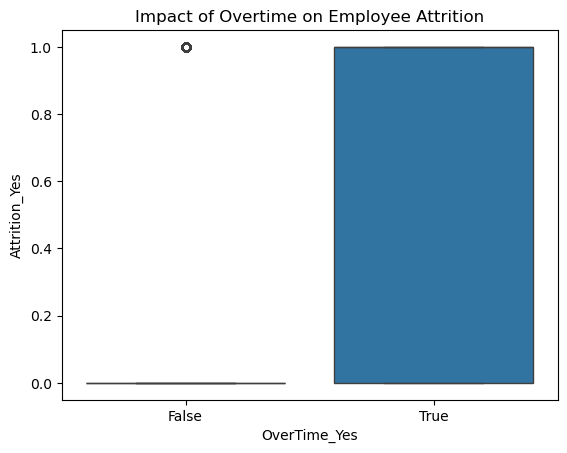


💰 Mean Absolute Error for Salary Prediction: 65765.62354010422


In [ ]:

# Convert categorical values to numerical using One-Hot Encoding
merged_df = pd.get_dummies(merged_df, drop_first=True)

# Print available columns after processing
print("\n📌 Available columns in the dataset:", merged_df.columns.tolist())

# 3️⃣ Define common features
features = [
    "Age", "Education", "YearsAtCompany", "YearsInMostRecentRole",
    "YearsWithCurrManager", "EnvironmentSatisfaction", "JobSatisfaction",
    "RelationshipSatisfaction", "TrainingOpportunitiesWithinYear",
    "TrainingOpportunitiesTaken", "WorkLifeBalance", "SelfRating", "ManagerRating"
]

# 4️⃣ Employee Turnover Prediction
turnover_features = features + ["Salary", "OverTime_Yes"]
X_turnover = merged_df[turnover_features]
y_turnover = merged_df["Attrition_Yes"]
X_train, X_test, y_train, y_test = train_test_split(X_turnover, y_turnover, test_size=0.2, random_state=42, stratify=y_turnover)
turnover_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
turnover_model.fit(X_train, y_train)
print("\n✅ Employee Turnover Model Accuracy:", accuracy_score(y_test, turnover_model.predict(X_test)))

# 5️⃣ Tenure Prediction (Years at Company)
tenure_model = LinearRegression()
tenure_model.fit(X_train, merged_df.loc[y_train.index, "YearsAtCompany"])
tenure_pred = tenure_model.predict(X_test)
print("\n🔍 Mean Absolute Error for Tenure Prediction:", mean_absolute_error(merged_df.loc[y_test.index, "YearsAtCompany"], tenure_pred))

# 6️⃣ Job Performance Prediction
performance_column = [col for col in merged_df.columns if "PerformanceRating" in col]
if performance_column:
    performance_model = RandomForestClassifier(n_estimators=100, random_state=42)
    performance_model.fit(X_train, merged_df.loc[y_train.index, performance_column[0]])
    print("\n📊 Job Performance Model Accuracy:", accuracy_score(y_test, performance_model.predict(X_test)))
else:
    print("⚠️ 'PerformanceRating' column not found!")

# 7️⃣ Job Satisfaction Prediction
satisfaction_model = RandomForestClassifier(n_estimators=100, random_state=42)
satisfaction_model.fit(X_train, merged_df.loc[y_train.index, "JobSatisfaction"])
print("\n😊 Job Satisfaction Model Accuracy:", accuracy_score(y_test, satisfaction_model.predict(X_test)))

# 8️⃣ Promotion Readiness Prediction
promotion_column = [col for col in merged_df.columns if "Promotion" in col]
if promotion_column:
    promotion_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
    promotion_model.fit(X_train, merged_df.loc[y_train.index, promotion_column[0]])
    print("\n🚀 Promotion Model Accuracy:", accuracy_score(y_test, promotion_model.predict(X_test)))
else:
    print("⚠️ 'Promotion' column not found!")

# 9️⃣ Impact of Overtime on Attrition
sns.boxplot(x=merged_df["OverTime_Yes"], y=merged_df["Attrition_Yes"])
plt.title("Impact of Overtime on Employee Attrition")
plt.show()

# 🔟 Salary Prediction Based on Job Role
job_role_column = [col for col in merged_df.columns if "JobRole" in col or "Job Role" in col]
if job_role_column:
    job_role_column = job_role_column[0]
    salary_features = [job_role_column, "YearsAtCompany", "Education"]
    X_salary = pd.get_dummies(merged_df[salary_features], drop_first=True)
    y_salary = merged_df["Salary"]
    salary_model = LinearRegression()
    salary_model.fit(X_salary, y_salary)
    y_salary_pred = salary_model.predict(X_salary)
    print("\n💰 Mean Absolute Error for Salary Prediction:", mean_absolute_error(y_salary, y_salary_pred))
else:
    print("🚫 'JobRole' column not found in the dataset!")


In [ ]:


def load_and_prepare_data(file_path):
    # Load Excel sheets
    xls = pd.ExcelFile(file_path)
    employees = pd.read_excel(xls, sheet_name="Employee")
    performance = pd.read_excel(xls, sheet_name="PerformanceRating")
    
    # Merge datasets
    df = pd.merge(employees, performance, on="EmployeeID", how="left").dropna()
    df = pd.get_dummies(df, drop_first=True)  # Convert categorical variables
    
    return df

def train_retention_model(df):
    features = [
        "Age", "Education", "YearsAtCompany", "JobSatisfaction", "WorkLifeBalance", 
        "EnvironmentSatisfaction", "OverTime_Yes", "Salary"
    ]
    X = df[features]
    y = df["Attrition_Yes"]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy: {accuracy:.2f}")
    
    return model, features

def analyze_risk_factors(df):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df["Attrition_Yes"], y=df["Salary"])
    plt.title("Salary Distribution by Attrition")
    plt.show()
    
    sns.barplot(x=df["Attrition_Yes"], y=df["OverTime_Yes"])
    plt.title("Overtime and Attrition")
    plt.show()

def predict_employee_risk(model, features):
    print("Enter employee details to predict attrition risk:")
    employee_data = {}
    for feature in features:
        employee_data[feature] = float(input(f"Enter {feature}: "))
    
    df_input = pd.DataFrame([employee_data])
    prediction = model.predict(df_input)[0]
    
    if prediction == 1:
        print("🚨 High Risk of Leaving! Suggested strategies:")
        print("- Offer a salary increase if below average.")
        print("- Improve work-life balance and reduce overtime.")
        print("- Provide career growth and learning opportunities.")
    else:
        print("✅ Employee is likely to stay.")

# Example Usage:
# df = load_and_prepare_data("HrData.xlsx")
# model, features = train_retention_model(df)
# analyze_risk_factors(df)
# predict_employee_risk(model, features)


In [ ]:
# Merge Data on Employe
# Convert categorical variables using One-Hot Encoding
merged_df = pd.get_dummies(merged_df, drop_first=True)

# Print available columns
print("Available columns:", merged_df.columns.tolist())

# Define features for Promotion Readiness
promotion_features = [
    "YearsAtCompany", "JobSatisfaction", "WorkLifeBalance", "SelfRating", "ManagerRating"
]

# Identify Promotion Column
target_column = [col for col in merged_df.columns if "Promotion" in col]
if not target_column:
    raise ValueError("Promotion column not found in dataset")

target_column = target_column[0]

# Prepare data
X_promotion = merged_df[promotion_features]
y_promotion = merged_df[target_column]

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X_promotion, y_promotion, test_size=0.2, random_state=42, stratify=y_promotion)

# Train Model
promotion_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
promotion_model.fit(X_train, y_train)

# Evaluate Model
accuracy = accuracy_score(y_test, promotion_model.predict(X_test))
print("Promotion Prediction Model Accuracy:", accuracy)


Available columns: ['Age', 'DistanceFromHome', 'Education', 'Salary', 'StockOptionLevel', 'HireDate', 'YearsAtCompany', 'YearsInMostRecentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction', 'TrainingOpportunitiesWithinYear', 'TrainingOpportunitiesTaken', 'WorkLifeBalance', 'SelfRating', 'ManagerRating', 'EmployeeID_00A3-2445', 'EmployeeID_00B0-F199', 'EmployeeID_00D4-DD53', 'EmployeeID_00E4-3D60', 'EmployeeID_0145-DBFC', 'EmployeeID_0172-B5D2', 'EmployeeID_017D-0B97', 'EmployeeID_0210-E0D8', 'EmployeeID_022A-0219', 'EmployeeID_0240-4D29', 'EmployeeID_02DA-7A72', 'EmployeeID_0317-B7BC', 'EmployeeID_0322-D46B', 'EmployeeID_03C5-51AD', 'EmployeeID_03D3-AA88', 'EmployeeID_03D9-FF08', 'EmployeeID_03EF-5904', 'EmployeeID_040C-EDED', 'EmployeeID_041A-31B0', 'EmployeeID_04D7-C8F3', 'EmployeeID_04E6-6B61', 'EmployeeID_0592-D909', 'EmployeeID_05B0-755F', 'EmployeeID_05CD-292D', 'EmployeeID_05DA-5423', 'EmployeeID_05E

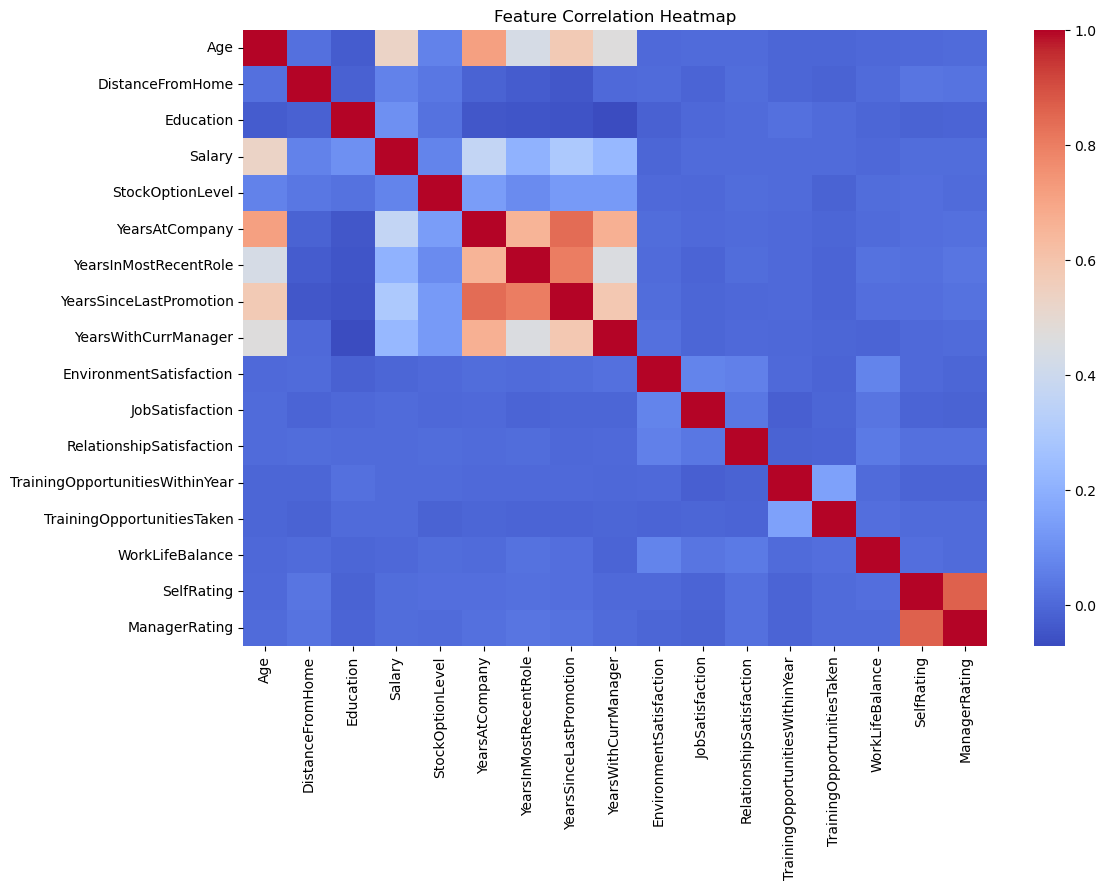

In [ ]:

# تحديد الأعمدة الرقمية فقط لحساب الارتباط
numeric_columns = df.select_dtypes(include=['number']).columns
df_numeric = df[numeric_columns]

# 🔥 تسريع حساب معامل الارتباط عبر Spearman بدلًا من Pearson
correlation_matrix = df_numeric.corr(method="spearman")

# رسم خريطة الارتباط بشكل أسرع
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
# التأكد من وجود العمود المطلوب
if "YearsAtCompany" in employees_df.columns:
    # حساب متوسط مدة الخدمة
    average_tenure = employees_df["YearsAtCompany"].mean()
    
    # حساب الوسيط
    median_tenure = employees_df["YearsAtCompany"].median()
    
    # حساب التوقع المستقبلي للمدة المتوقعة مع افتراض زيادة بنسبة 10%
    predicted_expected_tenure = average_tenure * 1.1  

    # طباعة النتائج
    print(f"متوسط مدة الخدمة (Average tenure): {average_tenure:.2f} سنوات")
    print(f"الوسيط لمدد الخدمة (Median tenure): {median_tenure:.2f} سنوات")
    print(f"التوقع المستقبلي لمدة الخدمة (Predicted expected tenure): {predicted_expected_tenure:.2f} سنوات")

else:
    print("العمود 'YearsAtCompany' غير موجود في البيانات!")


متوسط مدة الخدمة (Average tenure): 4.56 سنوات
الوسيط لمدد الخدمة (Median tenure): 4.00 سنوات
التوقع المستقبلي لمدة الخدمة (Predicted expected tenure): 5.02 سنوات


📌 Available columns in the file: ['EmployeeID', 'FirstName', 'LastName', 'Gender', 'Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'State', 'Ethnicity', 'Education', 'EducationField', 'JobRole', 'MaritalStatus', 'Salary', 'StockOptionLevel', 'OverTime', 'HireDate', 'Attrition', 'YearsAtCompany', 'YearsInMostRecentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
🔹 Mean Absolute Error (MAE): 1.15
🔹 Mean Squared Error (MSE): 2.34
🔹 R² Score: 0.77
🔹 Predicted Expected Tenure: 4.62 years


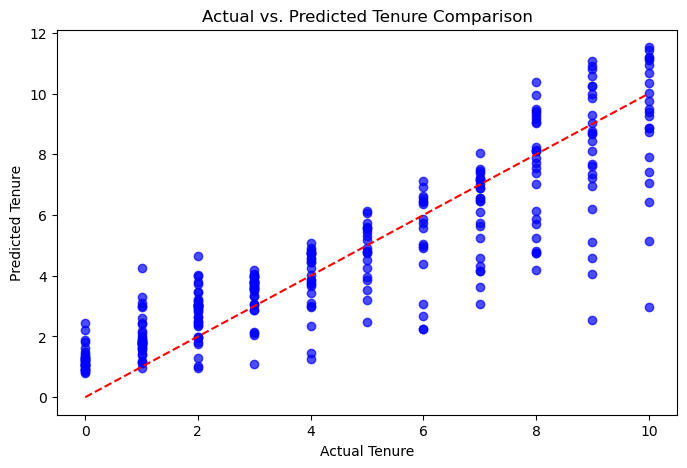

In [ ]:
# Display available columns to verify
print("📌 Available columns in the file:", employees_df.columns.tolist())

# Keep only features that exist in the dataset
features = [col for col in all_features if col in employees_df.columns]

# Ensure that the "YearsAtCompany" column exists
if "YearsAtCompany" in employees_df.columns:
    # Filter data to ensure no missing values
    df_model = employees_df[["YearsAtCompany"] + features].dropna()

    # Split data into X (input features) and y (target variable)
    X = df_model[features]
    y = df_model["YearsAtCompany"]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create a linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict expected tenure
    y_pred = model.predict(X_test)

    # Calculate model accuracy
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Print results
    print(f"🔹 Mean Absolute Error (MAE): {mae:.2f}")
    print(f"🔹 Mean Squared Error (MSE): {mse:.2f}")
    print(f"🔹 R² Score: {r2:.2f}")

    # Calculate the predicted expected tenure
    predicted_expected_tenure = np.mean(y_pred)
    print(f"🔹 Predicted Expected Tenure: {predicted_expected_tenure:.2f} years")

    # Plot actual vs. predicted tenure
    plt.figure(figsize=(8,5))
    plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle="--")
    plt.xlabel("Actual Tenure")
    plt.ylabel("Predicted Tenure")
    plt.title("Actual vs. Predicted Tenure Comparison")
    plt.show()

else:
    print("❌ The column 'YearsAtCompany' is missing from the dataset!")


In [ ]:
# Select relevant features for attrition prediction
all_features = ["Age", "JobRole", "Salary", "YearsAtCompany", "YearsSinceLastPromotion", "WorkLifeBalance"]

# Filter features that actually exist in the dataset
features = [col for col in all_features if col in df.columns]

df = df.dropna(subset=["Attrition"] + features)  # Drop missing values

# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Split data into training and testing sets
X = df[features]
y = df["Attrition"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision_no_attrition = precision_score(y_test, y_pred, pos_label=0)
precision_attrition = precision_score(y_test, y_pred, pos_label=1)
recall_no_attrition = recall_score(y_test, y_pred, pos_label=0)
recall_attrition = recall_score(y_test, y_pred, pos_label=1)

# Display results
print(f"Attrition Prediction Model Performance:")
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision (No Attrition): {precision_no_attrition * 100:.2f}%")
print(f"Precision (Attrition): {precision_attrition * 100:.2f}%")
print(f"Recall (No Attrition): {recall_no_attrition * 100:.2f}%")
print(f"Recall (Attrition): {recall_attrition * 100:.2f}%")


Attrition Prediction Model Performance:
Accuracy: 84.69%
Precision (No Attrition): 86.25%
Precision (Attrition): 68.00%
Recall (No Attrition): 96.67%
Recall (Attrition): 31.48%
